In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
with open('/home/zacharykeskinen/CS430-TeamE/PA3/slurms/logs/pi_leibniz-413063.log', 'r') as f:
    lns = f.readlines()

df = pd.DataFrame()
j = 0
for l in lns[10:]:
    if 'Running with' in l:
        if j != 0:
            for k, v in res.items():
                df.loc[num_proc, k] = v
        res = {}
        num_proc = int(l.split(' ')[-1].replace('\n',''))
        i = 10000
        j = 1
    elif 'Running' in l and 'with' not in l:
        i = int(l.split(' ')[1].replace('\n',''))
    elif 'Time' in l:
        res[i] = float(l.split(' ')[1].replace('s\n',''))

serial_res = {}
for l in lns[:10]:
    if 'Running' in l:
        size = int(l.replace('Running ','').replace('\n',''))
    elif 'run time' in l:
        l = l.replace('Serial run time: ','')
        serial_res[size] = float(l.replace(' seconds\n',''))
for k, v in serial_res.items():
    df.loc[1, k] = v

df = df.sort_index()
df = df.rename({10000:'10,000 Leibniz Terms', 1000000: '1 Million Leibniz Terms', 20000000000: '20 Billion Leibniz Terms'}, axis = 1)

Text(0.5, 1.0, 'Pi Leibniz MPI Execution Time')

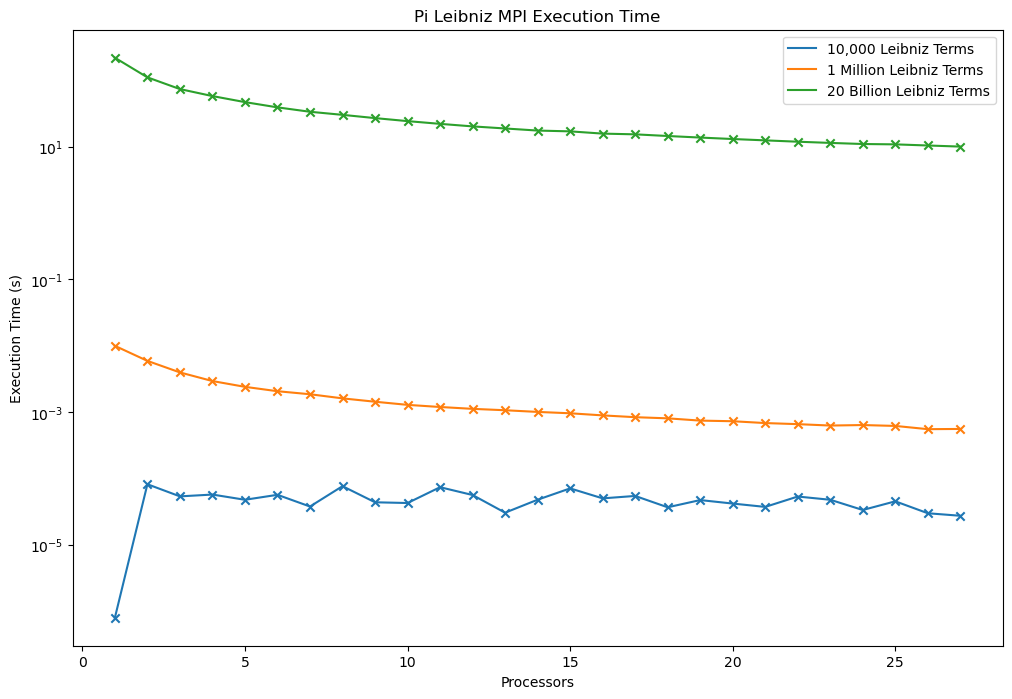

In [62]:
f, ax = plt.subplots(figsize = (12,8))
df.plot(ax = ax)
plt.scatter(df.index, df['10,000 Leibniz Terms'], marker = 'x')
plt.scatter(df.index, df['1 Million Leibniz Terms'], marker = 'x')
plt.scatter(df.index, df['20 Billion Leibniz Terms'], marker = 'x')

plt.xlabel("Processors")
plt.ylabel("Execution Time (s)")
plt.yscale("log")
plt.title("Pi Leibniz MPI Execution Time")

Text(0.5, 1.0, "Pi Leibniz's MPI Speed-Up")

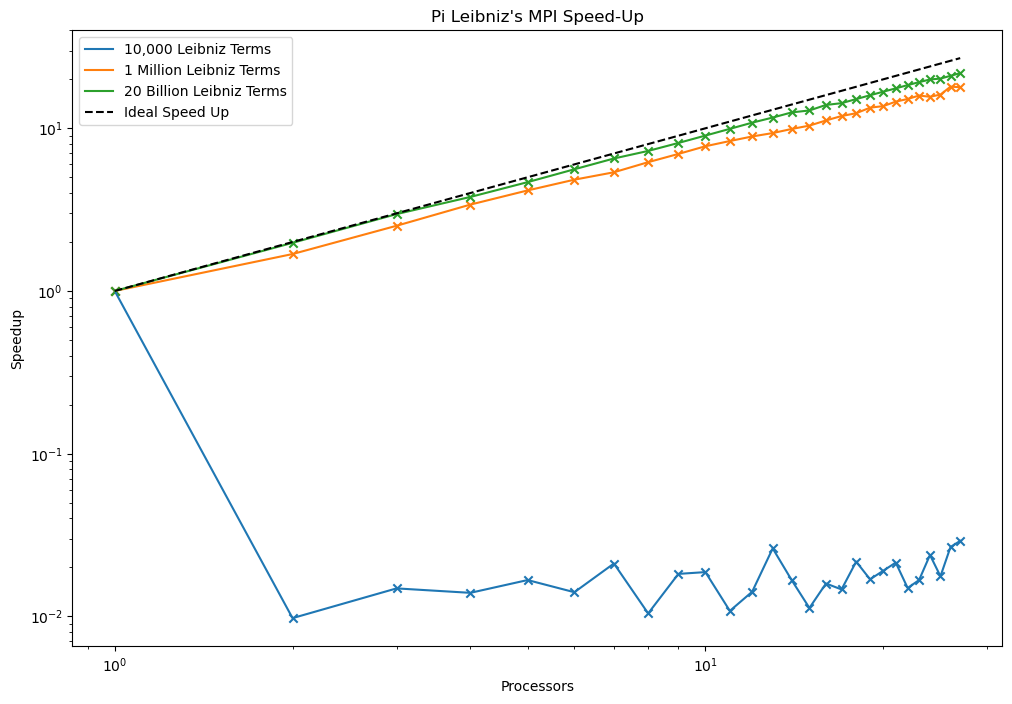

In [64]:
f, ax = plt.subplots(figsize = (12,8))
speed = df.iloc[0].div(df)
speed.plot(ax = ax)
plt.scatter(speed.index, speed['10,000 Leibniz Terms'], marker = 'x')
plt.scatter(speed.index, speed['1 Million Leibniz Terms'], marker = 'x')
plt.scatter(speed.index, speed['20 Billion Leibniz Terms'], marker = 'x')
ideal = range(1, 28)
plt.plot(ideal, ideal, label = 'Ideal Speed Up', linestyle = 'dashed', color = 'black')
plt.xlabel("Processors")
plt.ylabel("Speedup")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("Pi Leibniz's MPI Speed-Up")

# Pi MC

In [2]:
with open('/home/zacharykeskinen/CS430-TeamE/PA3/slurms/logs/pi_mc-413062.log', 'r') as f:
    lns = f.readlines()

df = pd.DataFrame()
j = 0
for l in lns[13:]:
    if 'Running with' in l:
        if j != 0:
            for k, v in res.items():
                df.loc[num_proc, k] = v
        res = {}
        num_proc = int(l.split(' ')[-1].replace('\n',''))
        i = 10000
        j = 1
    elif 'Running' in l and 'with' not in l:
        i = int(l.split(' ')[1].replace('\n',''))
    elif 'Time' in l:
        res[i] = float(l.split(' ')[1].replace('s\n',''))

serial_res = {}
for l in lns[:13]:
    if 'Running' in l:
        size = int(l.replace('Running ','').replace('\n',''))
    elif 'run time' in l:
        l = l.replace('Serial run time: ','')
        serial_res[size] = float(l.replace(' seconds\n',''))
for k, v in serial_res.items():
    df.loc[1, k] = v
df = df.sort_index()
df = df.rename({10000:'10,000 Values', 1000000: '1 Million Values', 20000000000: '20 Billion Values'}, axis = 1)

Text(0.5, 1.0, 'Pi Monte Carlo MPI Execution Time')

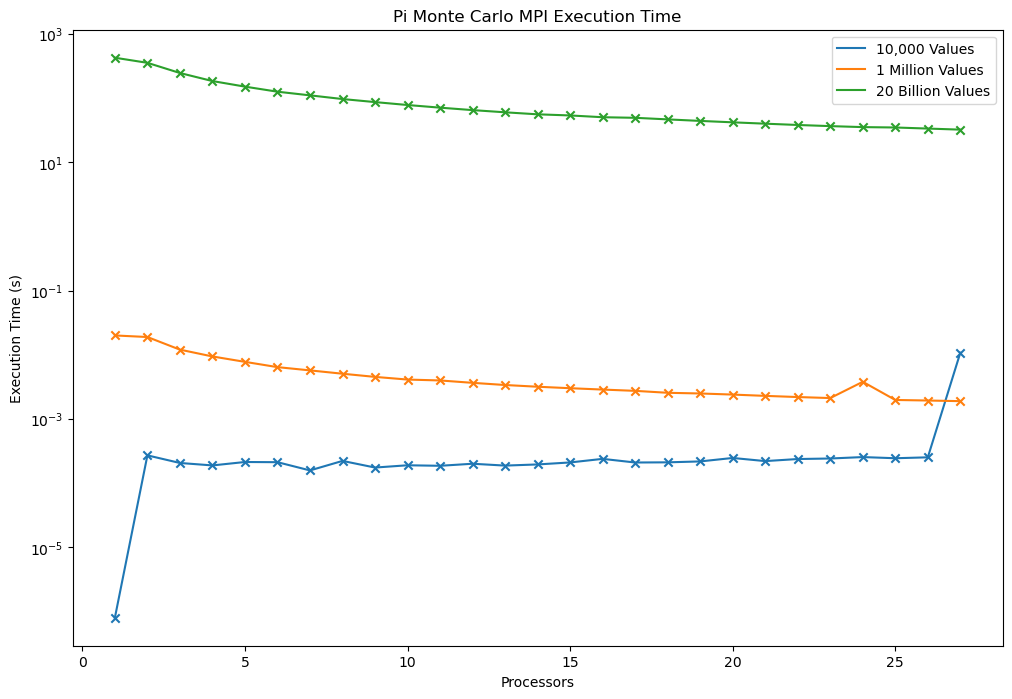

In [3]:
f, ax = plt.subplots(figsize = (12,8))
df.plot(ax = ax)
plt.scatter(df.index, df['10,000 Values'], marker = 'x')
plt.scatter(df.index, df['1 Million Values'], marker = 'x')
plt.scatter(df.index, df['20 Billion Values'], marker = 'x')

plt.xlabel("Processors")
plt.ylabel("Execution Time (s)")
plt.yscale("log")
plt.title("Pi Monte Carlo MPI Execution Time")

Text(0.5, 1.0, "Pi Monte Carlo's MPI Speed-Up")

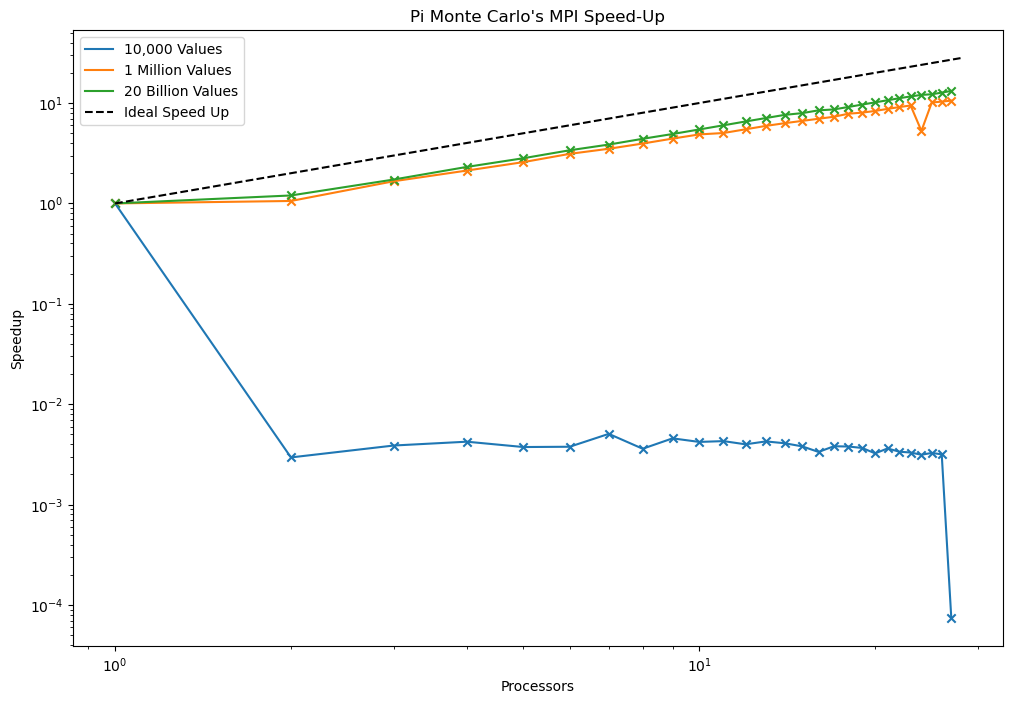

In [4]:
f, ax = plt.subplots(figsize = (12,8))
speed = df.iloc[0].div(df)
speed.plot(ax = ax)
plt.scatter(speed.index, speed['10,000 Values'], marker = 'x')
plt.scatter(speed.index, speed['1 Million Values'], marker = 'x')
plt.scatter(speed.index, speed['20 Billion Values'], marker = 'x')
ideal = range(1, 29)
plt.plot(ideal, ideal, label = 'Ideal Speed Up', linestyle = 'dashed', color = 'black')
plt.xlabel("Processors")
plt.ylabel("Speedup")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("Pi Monte Carlo's MPI Speed-Up")